# Анализ признаков болезни и предсказание.

<img src='heart.jpg' style='width:350px;height:300px'/>

---
Компания "Тралала" поручила одному из работников создать пару моделей классификации для предсказания того, могут ли быть у пациента признаки болезни сердца в зависимости от физических характеристик этого человека (возраст, пол, холистерол и т.д.) и выбрать оптимальный вариант.

---

## Импорт необходимых библиотек:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

warnings.filterwarnings("ignore")

### Для начала загрузим данных и проанализируем их.

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Данные

В базе данных содержатся 14 атрибутов о физическом тестировании пациентов. Они сдают кровь и выполняют небольшой физический тест. Колонка `target` указывает на наличие заболевания сердца у пациента - 0 означает заболевания нет, 1 означает заболевание есть. В общем случае, подтвердить на 100% заболевание сердца это очень сложный процесс, поэтому если мы сможем построить модель, которая достаточно точно оценивает вероятность заболевания, то это поможет избежать дорогих процедур.

Содержимое

Информация об представленный выше колонках:

* age - возраст
* sex - пол
* cp - chest pain - тип боли в груди (4 значения)
* trestbps - resting blood pressure - давление в состоянии покоя
* chol - уровень холистерина в крови, в mg/dl
* fbs - fasting blood sugar - уровень сахара в крови, > 120 mg/dl
* restecg - resting electrocardiographic results - результаты электрокардиограммы (значнеия 0,1,2)
* thalach - максимальный пульс
* exang - exercise induced angina - возникновение ангины в результате упражнений
* oldpeak = пиковые значения в электрокардиограмме, как результат упражнений (по сравнению с состоянием покоя)
* slope - наклон пикового значения в электрокардиограмме, как результат упражнений (по сравнению с состоянием покоя)
* ca - количество крупных сосудов (0-3), окрашенных флурозопией
* thal -  3 = нормально; 6 = фиксированный дефект; 7 = обратимый дефект
* target - 0 означает отсутствие заболевания сердца, 1 означает наличие заболевания сердца

Источник: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

---
NaN значения не обнаружены. Необходимость преобразовывать типы данных нету, int и float нас устраивают. Можно понизить занимаемую память с int64, float64 до int16, float16

---

In [6]:
df = df.astype({'age': 'int16',
                'sex': 'int16',
                'cp': 'int16',
                'trestbps': 'int16',
                'chol': 'int16',
                'fbs': 'int16',
                'restecg': 'int16',
                'thalach': 'int16',
                'exang': 'int16',
                'oldpeak': 'float16',
                'slope': 'int16',
                'ca': 'int16',
                'thal': 'int16',
                'target': 'int16'})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int16  
 1   sex       303 non-null    int16  
 2   cp        303 non-null    int16  
 3   trestbps  303 non-null    int16  
 4   chol      303 non-null    int16  
 5   fbs       303 non-null    int16  
 6   restecg   303 non-null    int16  
 7   thalach   303 non-null    int16  
 8   exang     303 non-null    int16  
 9   oldpeak   303 non-null    float16
 10  slope     303 non-null    int16  
 11  ca        303 non-null    int16  
 12  thal      303 non-null    int16  
 13  target    303 non-null    int16  
dtypes: float16(1), int16(13)
memory usage: 8.4 KB


Значительно уменьшили занимаемую память. Можем переходить к анализу.

Убудимся что колонка `target` действительно имеет два уникальных значения.

In [8]:
df['target'].unique()

array([1, 0], dtype=int16)

#### Нарисуем график, показывающий количество точек для каждого значения target.

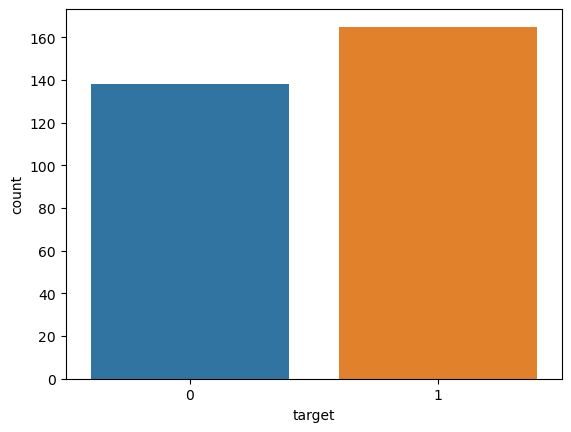

In [9]:
sns.countplot(data=df, x='target')
plt.show()

Видим, что классы хорошо сбалансированны. 

#### Нарисуем график pairplot, показывающий связи между выбранными колонками:

    ['age','trestbps', 'chol','thalach','target']
   

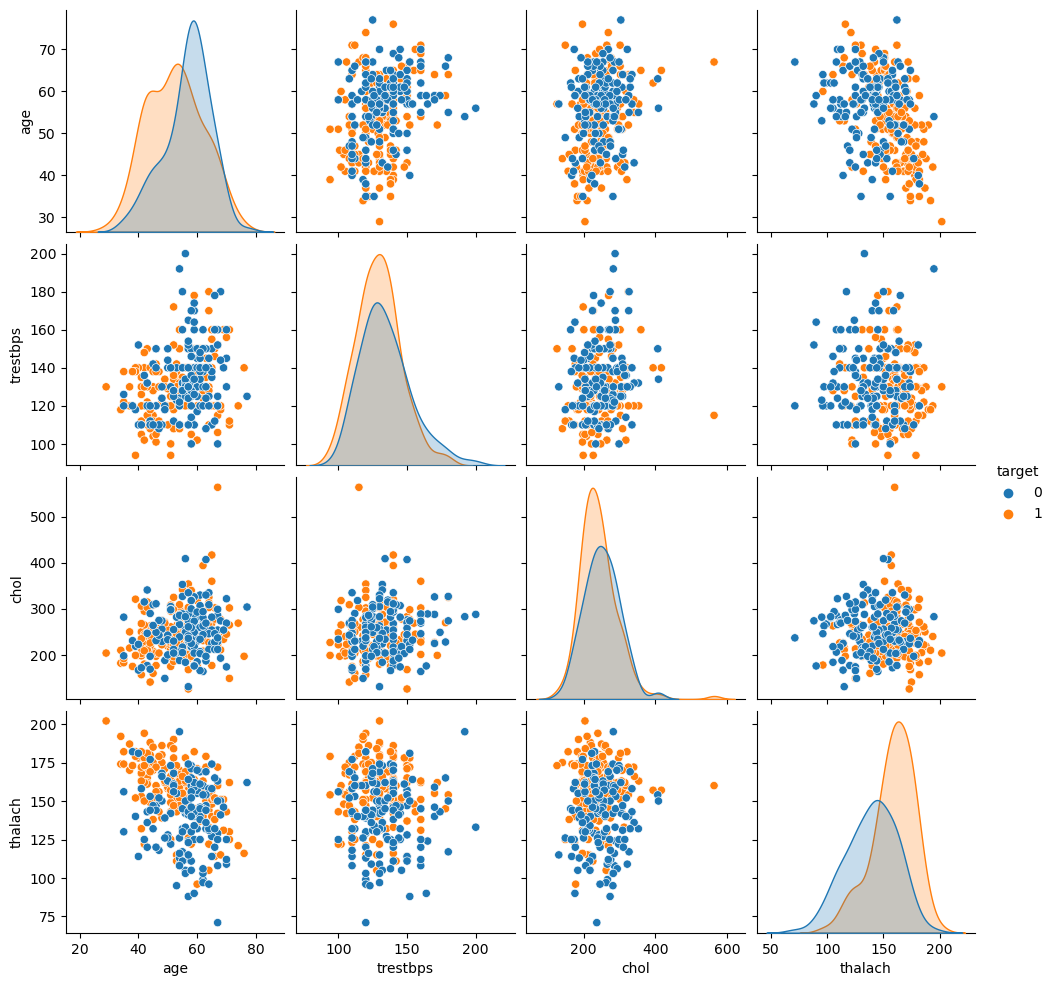

In [10]:
sns.pairplot(data=df[['age','trestbps', 'chol','thalach','target']], hue='target')
plt.show()

#### Теперь построим график heatmap, для того, чтобы посмотреть как колонки коррелируют между собой.  

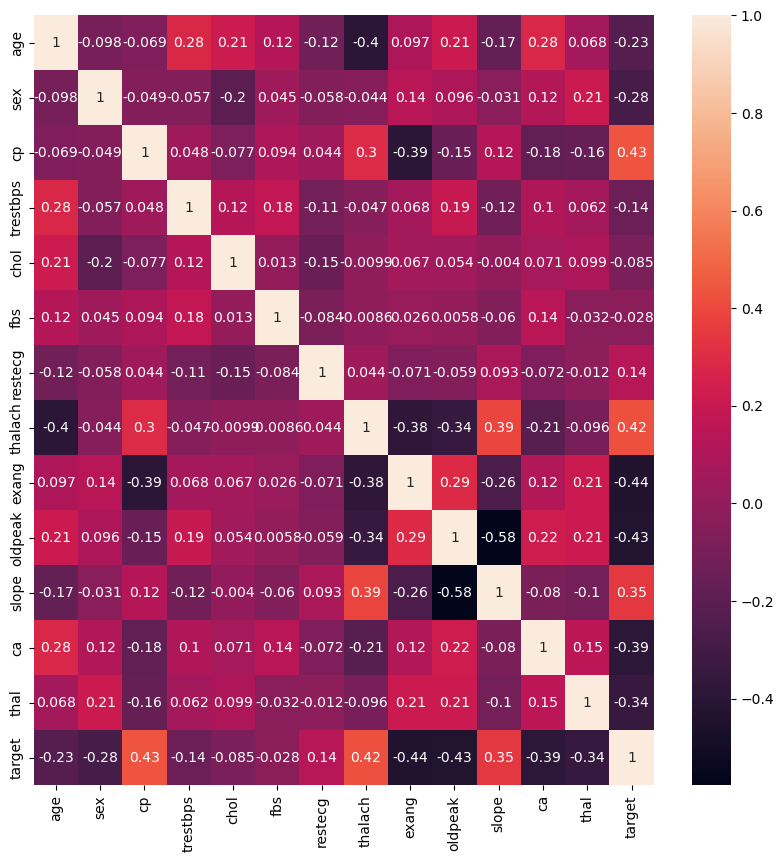

In [11]:
plt.figure(figsize=(10, 10))

sns.heatmap(df.corr(), annot=True)
plt.show()

Наибольший интерес у нас вызывает - как отдельные признаки коррелируют с целевой переменной `target`. На графике для многих признаков мы видим средне выраженную корреляцию.

---------

# Машинное обучение

### Разобьем данные на обучающий и тестовый наборы, сделаем масштабирование данных и создадим первую модель логистической регрессии.
 

In [12]:
X = df.drop('target', axis=1) # признаки
y = df['target'] # целевая переменная

# разбиваем данные на обучающие и тестовые  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)


# нормализуем данные признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Создадим простую модель логистической регрессии
log_model = LogisticRegressionCV() # создание модели
log_model.fit(X_train, y_train) #  обучение модели на обучающем сете данных

LogisticRegressionCV()

##### Отобразим результаты поиска оптимальных параметров, которые модель посчитала необходимыми и значение C.


In [13]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [14]:
log_model.C_

array([0.04641589])

##### Коэффициенты:

In [15]:
log_model.coef_

array([[-0.09621762, -0.39460253,  0.53534441, -0.13850112, -0.08830628,
         0.02487728,  0.08083565,  0.29914029, -0.33437422, -0.35239326,
         0.25100504, -0.49735939, -0.37448801]])

##### Создадим визуализацию коэффициентов, нарисуя их с помощью графика barplot.

In [16]:
coefs = pd.Series(index=X.columns,data=log_model.coef_[0])

In [17]:
coefs = coefs.sort_values()

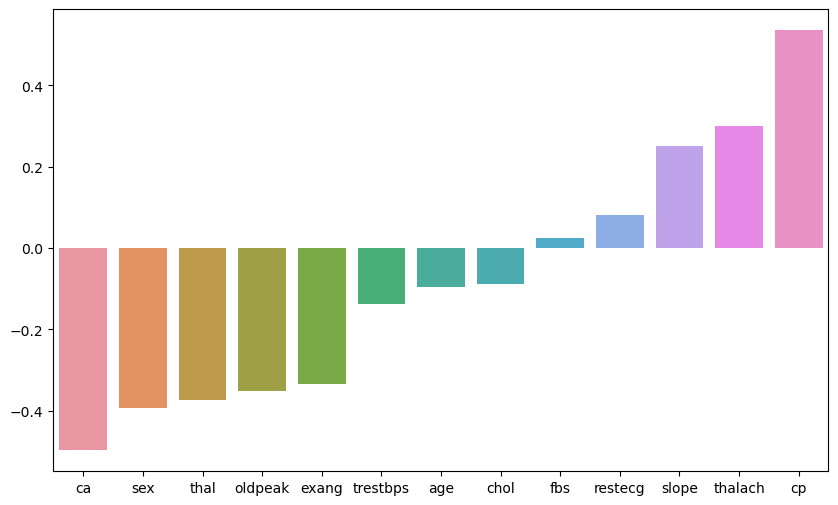

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(x=coefs.index,y=coefs.values)
plt.show()

---------

## Проведем оценку модели

Оценим работу на тестовом наборе данных.

In [19]:
y_pred = log_model.predict(X_test)

##### Строим матрицу ошибок:

In [20]:
confusion_matrix(y_test, y_pred)

array([[12,  3],
       [ 2, 14]])

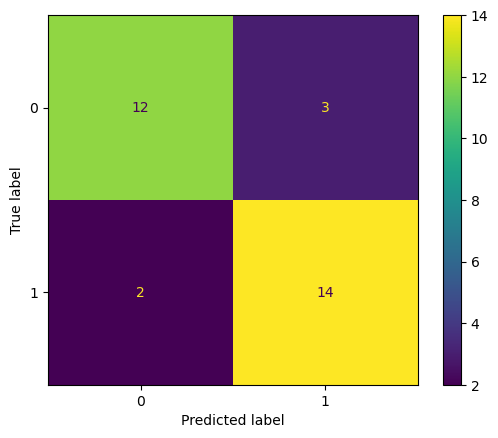

In [21]:
# график матрицы ошибок
plot_confusion_matrix(log_model, X_test, y_test)
plt.show()

In [22]:
# отчет classification_report:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



Наша модель ведет себя относительно неплохо, возможно с подбором гиперпараметров GridSearchCV мы сможем еще немного улучшить нашу модель. Но стоит сказать, что у нас в целом очень маленький объем данных всего 31 строка и из них, 5 строк были классифицированны неправильно, поэтому если мы добьемся уменьшения до 4 строк, то мы увидим резкое увеличение метрики `accuracy`. Хотя по факту мы улучшим отчет классификации только для одной строки.

##### Кривые производительности:

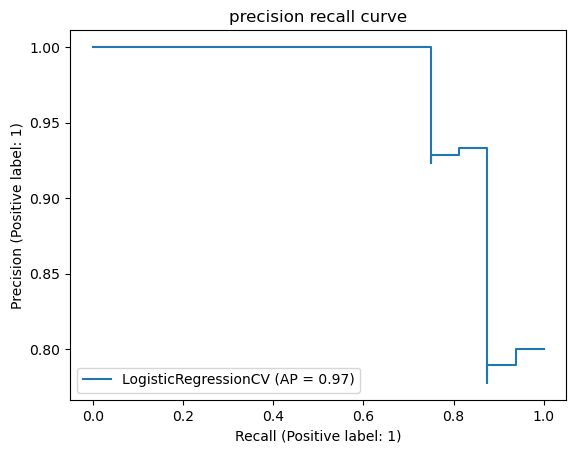

In [23]:
plot_precision_recall_curve(log_model, X_test,y_test)
plt.title('precision recall curve')
plt.show()

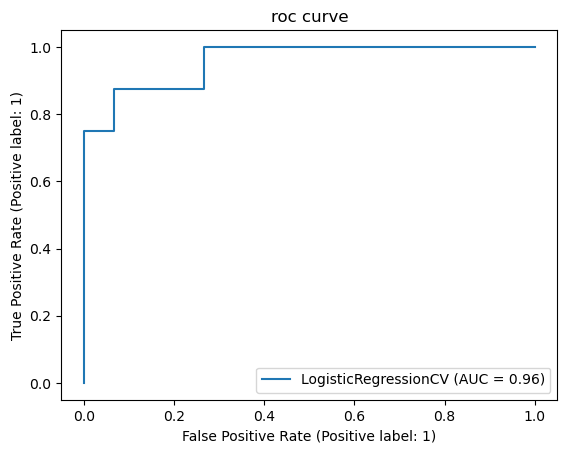

In [24]:
plot_roc_curve(log_model, X_test, y_test) 
plt.title('roc curve')
plt.show()

##### Далее давайте посмотрим на то, как справляется модель с новыми данными.

In [25]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [26]:
new_pred = log_model.predict(scaler.transform(patient)) # передаем нормализованные данных
new_pred

array([0], dtype=int16)

In [27]:
# рассчитываем вероятность распределения в группу
logCV_model_proba = log_model.predict_proba(scaler.transform(patient))
logCV_model_proba

array([[0.94751289, 0.05248711]])

---
Наша модель показывает что с вероятностью в **94 процента**, человек попадает в группу - `0`
, где отсутствую заболевания сердца.

Далее давайте обучим модель на всех данных и посмотрим как с теми же данными справиться финальная модель.

---

In [28]:
final_model = LogisticRegressionCV() # создаем финальную модель
final_model.fit(scaler.fit_transform(X),y) # обучаем на нормализированных данных

LogisticRegressionCV()

In [29]:
new_pred = final_model.predict(scaler.transform(patient)) # передаем нормализованные данных
new_pred

array([0], dtype=int16)

In [30]:
final_model_proba = final_model.predict_proba(scaler.transform(patient))
final_model_proba

array([[0.99305933, 0.00694067]])

И видим, что финальная модель уже с повышенной вероятность **99.3 процента** отнесет человека из тестового набора данных в `0` группу с отсутствие заболевания сердца.

---
### С такой высокой вероятностью мы могли бы на этом закончить, но конечная цель - создать и сравнить результаты двух разных моделей на новом массиве данных. Поэтому, приступим к созданию второй модели, с автоподбором гиперпараметров.  
---

In [31]:
X = df.drop('target', axis=1) # признаки
y = df['target'] # целевая переменная

# разбиваем данные на обучающие и тестовые  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# нормализуем данные признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# создание второй модели с увеличенным количеством максимальных итераций
log_model_2 = LogisticRegression(max_iter=5000)

# параметры для перебора оптимальных значений
penalty = ['l1', 'l2', 'elasticnet']
l1_ratio = np.linspace(0,1,20)
C = np.logspace(0,10, 20)
param_grid = {'penalty' :penalty, 'l1_ratio': l1_ratio, 'C': C}

# создание модели на основе созданных параметров с нахождением оптимальных значений
grid_model = GridSearchCV(log_model_2, param_grid=param_grid) 

# обучение модели на обучающих данных
grid_model.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

Взглянем на лучшие параметры

In [32]:
grid_model.best_estimator_

LogisticRegression(C=3.3598182862837818, l1_ratio=0.0, max_iter=5000)

## Проведем оценку модели

In [33]:
y_pred = grid_model.predict(X_test)

##### Строим матрицу ошибок:

In [34]:
confusion_matrix(y_test, y_pred)

array([[12,  3],
       [ 2, 14]])

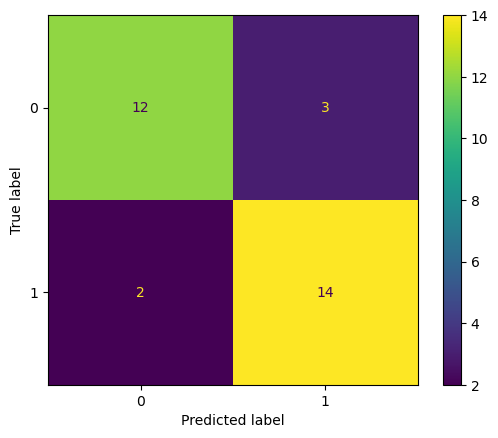

In [35]:
# график матрицы ошибок
plot_confusion_matrix(grid_model, X_test, y_test)
plt.show()

In [36]:
# отчет classification_report:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



##### Кривые производительности:

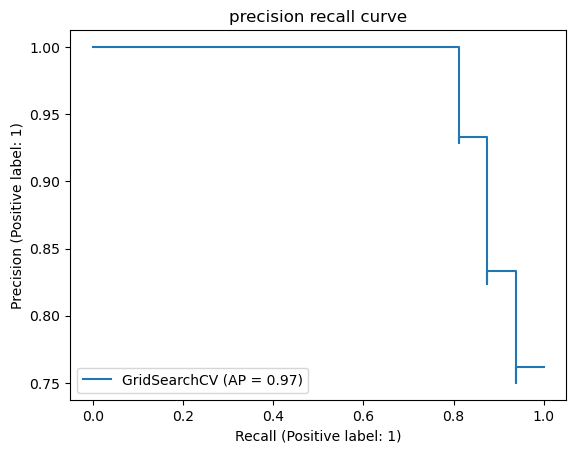

In [37]:
plot_precision_recall_curve(grid_model, X_test,y_test)
plt.title('precision recall curve')
plt.show()

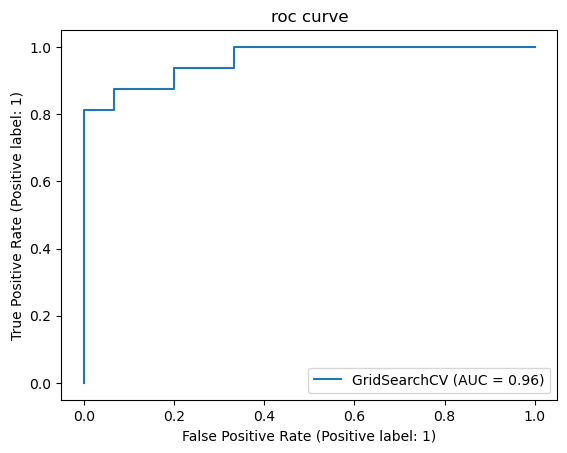

In [38]:
plot_roc_curve(grid_model, X_test, y_test) 
plt.title('roc curve')
plt.show()

Матрица ошибок, отчёт о классификации и кривые производительности ничем не различаются от предыдущей модели, что странно. Перейдем к оцениванию на подготовленных данных.

##### Оценим работу на том же раннее подготовленом массиве данных, сначала для этой версии модели а потом для финальной(обученной на всех данных).

In [39]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [40]:
grid_model.predict(scaler.transform(patient))

array([0], dtype=int16)

In [41]:
log_grid_model_proba = grid_model.predict_proba(scaler.transform(patient))
log_grid_model_proba

array([[0.9922366, 0.0077634]])

--- 
Как мы видим из результатов вывода: стандартая LogisticRegression с GridSearchCV на обучающем наборе данных показывает результат в **99.2 процента** к распределению пациента в группу - `0` группу с отсутствие заболевания сердца. Что является показателем лучше, чем у модели созданной на LogisticRegressionCV.
Посмотрим какой вывод будет на модели обученной на всех данных.

---

In [42]:
# создание финальной модели с увеличенным количеством максимальных итераций
log_model_2 = LogisticRegression(max_iter=5000)

# параметры для перебора оптимальных значений
penalty = ['l1', 'l2', 'elasticnet']
l1_ratio = np.linspace(0,1,20)
C = np.logspace(0,10, 20)
param_grid = {'penalty' :penalty, 'l1_ratio': l1_ratio, 'C': C}

# создание финальной модели на основе созданных параметров с нахождением оптимальных значений
grid_final_model = GridSearchCV(log_model_2, param_grid=param_grid) 

# обучение модели на обучающих данных
grid_final_model.fit(X,y)

GridSearchCV(estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [43]:
grid_final_model.predict(scaler.transform(patient))

array([0], dtype=int16)

In [44]:
final_model_grid_proba = grid_final_model.predict_proba(scaler.transform(patient))
final_model_grid_proba

array([[0.93019527, 0.06980473]])

---
И тут мы можем заметить ухудшающее положение - **93 процента** LogisticRegression c GridSearchCV против **99.3 процентов** у LogisticRegressionCV.

---

#### Сделаем табличное сравнение данных вывода модели для более наглядного представления:

In [45]:
table_result = pd.DataFrame({'LogRegCV': 
                                                 [round(logCV_model_proba[0][0] * 100, 2),
                                                  round(final_model_proba[0][0] * 100, 2)],
                             'LogReg_with_GridSearchCV': 
                                                 [round(log_grid_model_proba[0][0] * 100, 2),
                                                  round(final_model_grid_proba[0][0] * 100, 2)],
                            }, index=['Only_train_set', 'Full_set'])

table_of_models = pd.DataFrame({'model': ['LogisticRegressionCV', 'LogisticRegression с GridSearchCV'],
                                'result': [round(final_model_proba[0][0] * 100, 2), 
                                           round(final_model_grid_proba[0][0] * 100, 2)]})

In [46]:
table_result

,LogRegCV,LogReg_with_GridSearchCV
Only_train_set,94.75,99.22
Full_set,99.31,93.02


Как мы можем наблюдать, сначала LogisticRegression c GridSearchCV(`LogReg_with_GridSearchCV`) на обучающих данных показывала результат лучше, чем LogisticRegressionCV(`LogRegCV`). Но после обучения на полном наборе данных, показала результаты хуже, чем на обучающих. Что же касается LogisticRegressionCV(`LogRegCV`) то эта модель показал рост результата после обучения на всем наборе данных.

---
# Вывод:
Нам были предоставлены исторические данные о физическом тестировании пациентов. На основе этих данных мы сформировали признаки для обучения модели с целью прогнозирования пациентов у которых возможно есть болезни сердца. 

Однозначный ответ о том какая модель лучше в случае с одним и тем же отчётом о классификации сказать сложно. Но лучшие результаты на подготовленных данных мы достигли с моделью на основе алгоритма LogisticRegressionCV – перебора параметров по сетке с последующей кросс-валидацией.



---